### Submetric 2: Fire Incidents

#### Aakash Arvapalli

Loading data

In [1]:
import pandas as pd
import geopandas as gpda
from matplotlib import pyplot as plt
import numpy as np

Read in information from the csv file

In [15]:
fire = pd.read_csv("fire.csv")
fire.head()

,call_no,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",2016-04-21T05:01:04,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",2018-03-13T08:34:43,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",2018-03-13T11:54:23,0,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",2017-05-31T08:39:47,0,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",2018-03-09T10:26:42,1,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607


isolate only the relevant columns of our data frame, which include the type_description of the fire event and the neighborhood each fire was reported


In [23]:
neighborhoods = pd.DataFrame(columns = ["type_description", "neighborhood"])
neighborhoods["type_description"] = fire["type_description"]
neighborhoods["neighborhood"] = fire["neighborhood"]

neighborhoods.head()

,type_description,neighborhood
0,Building fire,NaN
1,Building fire,NaN
2,Passenger vehicle fire,NaN
3,Passenger vehicle fire,Fineview
4,Building fire,Fairywood


Drop the not applicable values as they dont provide any information

In [24]:
neighborhoods = neighborhoods.dropna()

Then we want to print out all the neighborhood names and we want to separate by unique because we don't want duplicates

In [25]:
print(len(neighborhoods['neighborhood'].unique()))
print(neighborhoods['neighborhood'].unique())

91
['Fineview' 'Fairywood' 'South Side Flats' 'Allegheny Center'
 'Lincoln-Lemington-Belmar' 'Carrick' 'Beechview' 'Allentown'
 'Beltzhoover' 'Crafton Heights' 'Homewood North' 'Squirrel Hill South'
 'Perry North' 'Bedford Dwellings' 'Homewood South' 'East Allegheny'
 'Crawford-Roberts' 'Sheraden' 'Middle Hill' 'Strip District' 'East Hills'
 'Garfield' 'Greenfield' 'North Shore' 'Spring Hill-City View'
 'Central Business District' 'Upper Hill' 'Manchester' 'Overbrook'
 'Polish Hill' 'Central Lawrenceville' 'Brookline' 'Marshall-Shadeland'
 'North Oakland' 'South Oakland' 'Homewood West' 'East Liberty'
 'Hazelwood' 'Squirrel Hill North' 'Friendship' 'West Oakland'
 'Terrace Village' 'Brighton Heights' 'Troy Hill' 'Windgap' 'Knoxville'
 'Upper Lawrenceville' 'Arlington' 'Elliott' 'South Side Slopes'
 'Bloomfield' 'Perry South' 'Central Northside' 'Point Breeze' 'Bluff'
 'Mount Washington' 'Point Breeze North' 'Swisshelm Park' 'Banksville'
 'Shadyside' 'Spring Garden' 'Regent Square' 'All

This allows us to group the neighborhoods and the type_description by specifically seeing the number of instances of each type of fire

In [30]:
grouped_neighborhoods = neighborhoods.groupby('neighborhood')['type_description'].value_counts()
grouped_neighborhoods

neighborhood      type_description                               
Allegheny Center  Cooking fire, confined to container                17
                  Outside rubbish, trash or waste fire                7
                  Brush or brush-and-grass mixture fire               6
                  Dumpster or other outside trash receptacle fire     5
                  Natural vegetation fire, Other                      5
                                                                     ..
Windgap           Mobile property (vehicle) fire, Other               1
                  Natural vegetation fire, Other                      1
                  Outside rubbish, trash or waste fire                1
                  Special outside fire, Other                         1
                  Trash or rubbish fire, contained                    1
Name: type_description, Length: 1269, dtype: int64

Adding to a dictionary for further use and manipulation of the data

In [32]:
neighborhood_dict = grouped_neighborhoods.to_dict()
neighborhood_dict

{('Allegheny Center', 'Cooking fire, confined to container'): 17,
 ('Allegheny Center', 'Outside rubbish, trash or waste fire'): 7,
 ('Allegheny Center', 'Brush or brush-and-grass mixture fire'): 6,
 ('Allegheny Center', 'Dumpster or other outside trash receptacle fire'): 5,
 ('Allegheny Center', 'Natural vegetation fire, Other'): 5,
 ('Allegheny Center', 'Passenger vehicle fire'): 5,
 ('Allegheny Center', 'Outside rubbish fire, Other'): 3,
 ('Allegheny Center', 'Special outside fire, Other'): 3,
 ('Allegheny Center', 'Trash or rubbish fire, contained'): 3,
 ('Allegheny Center', 'Building fire'): 2,
 ('Allegheny Center', 'Fire in portable building, fixed location'): 1,
 ('Allegheny Center', 'Fire, Other'): 1,
 ('Allegheny Center', 'Fuel burner/boiler malfunction, fire confined'): 1,
 ('Allegheny Center', 'Mobile property (vehicle) fire, Other'): 1,
 ('Allegheny Center', 'Outside equipment fire'): 1,
 ('Allegheny West', 'Passenger vehicle fire'): 11,
 ('Allegheny West', 'Building fire')

In [59]:
items = dict()
for index, row in neighborhoods.iterrows():
    if row['type_description'] not in items:
        items[row['type_description']] = 1
    else:
        items[row['type_description']] += 1

items['Cooking fire, confined to container'] *= 1.5
items['Building fire'] *= 1.5
items['Outside rubbish, trash or waste fire'] *= 1.5

This goes through and lists the number of times each type_description occured. I wanted to highlight the value of cooking fires, building fires, and outside trash because these would drive out birds to the greatest extent

In [60]:
items

{'Passenger vehicle fire': 857,
 'Building fire': 2491.5,
 'Outside rubbish fire, Other': 446,
 'Cooking fire, confined to container': 2727.0,
 'Outside rubbish, trash or waste fire': 955.5,
 'Trash or rubbish fire, contained': 367,
 'Brush or brush-and-grass mixture fire': 444,
 'Special outside fire, Other': 202,
 'Mobile property (vehicle) fire, Other': 163,
 'Fuel burner/boiler malfunction, fire confined': 55,
 'Fires in structure other than in a building': 120,
 'Off-road vehicle or heavy equipment fire': 13,
 'Outside equipment fire': 59,
 'Fire, Other': 102,
 'Garbage dump or sanitary landfill fire': 5,
 'Dumpster or other outside trash receptacle fire': 372,
 'Grass fire': 110,
 'Chimney or flue fire, confined to chimney or flue': 43,
 'Natural vegetation fire, Other': 217,
 'Commercial Compactor fire, confined to rubbish': 12,
 'Self-propelled motor home or recreational vehicle': 1,
 'Outside storage fire': 17,
 'Construction or demolition landfill fire': 18,
 'Forest, woods o

In [80]:
incidents_per_neighborhood = neighborhoods.groupby('neighborhood').size().sort_values(ascending=True).reset_index(name='count')
sorted_list = incidents_per_neighborhood[['neighborhood', 'count']].values.tolist()


Then we sort the list by asce

In [81]:
sorted_list

[['Mount Oliver Borough', 6],
 ['Regent Square', 9],
 ['Mt. Oliver', 11],
 ['East Carnegie', 11],
 ['St. Clair', 11],
 ['Ridgemont', 12],
 ['Arlington Heights', 13],
 ['Oakwood', 13],
 ['Chartiers City', 15],
 ['Swisshelm Park', 16],
 ['Bon Air', 19],
 ['Hays', 20],
 ['Glen Hazel', 20],
 ['Windgap', 20],
 ['West End', 20],
 ['Summer Hill', 21],
 ['New Homestead', 21],
 ['Esplen', 22],
 ['Spring Garden', 23],
 ['South Shore', 23],
 ['Fairywood', 24],
 ['Westwood', 26],
 ['Friendship', 30],
 ['Morningside', 32],
 ['California-Kirkbride', 38],
 ['Polish Hill', 38],
 ['Duquesne Heights', 39],
 ['Chateau', 40],
 ['Allegheny West', 42],
 ['Bedford Dwellings', 42],
 ['Upper Hill', 44],
 ['Fineview', 46],
 ['Point Breeze North', 49],
 ['Upper Lawrenceville', 50],
 ['Arlington', 50],
 ['Lower Lawrenceville', 53],
 ['Overbrook', 55],
 ['Stanton Heights', 55],
 ['Banksville', 58],
 ['Strip District', 58],
 ['West Oakland', 58],
 ['Homewood West', 59],
 ['Lincoln Place', 59],
 ['Allegheny Center',

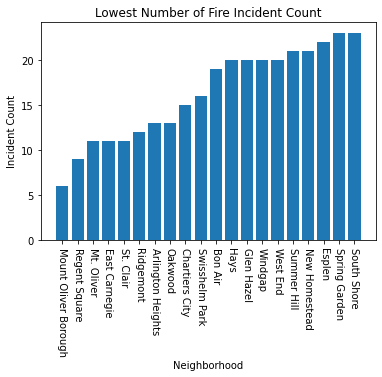

In [85]:
# Get the top 20 neighborhoods
top_20_neighborhoods = sorted_list[:20]

# Create a bar graph
x = [neighborhood for neighborhood, count in top_20_neighborhoods]
y = [count for neighborhood, count in top_20_neighborhoods]
plt.bar(x, y)

# Set the labels and title
plt.xlabel('Neighborhood')
plt.ylabel('Incident Count')
plt.title('Lowest Number of Fire Incident Count')

# Flip the tick labels vertically
plt.xticks(rotation=270)

# Show the plot
plt.show()




In [87]:
top_10_neighborhoods = sorted_list[:10]

In [88]:
top_10_neighborhoods

[['Mount Oliver Borough', 6],
 ['Regent Square', 9],
 ['Mt. Oliver', 11],
 ['East Carnegie', 11],
 ['St. Clair', 11],
 ['Ridgemont', 12],
 ['Arlington Heights', 13],
 ['Oakwood', 13],
 ['Chartiers City', 15],
 ['Swisshelm Park', 16]]